# Example 1
Basic usage with an image stack and reference image in the correct format. 


Clone and install repo locally and download the example data if you have not already done this in the current working directory.

In [2]:
!git clone https://github.com/rg314/pytraction.git
!pip install pytraction/

fatal: destination path 'pytraction' already exists and is not an empty directory.
Processing ./pytraction


  Created wheel for pytraction: filename=pytraction-0.0.0-py3-none-any.whl size=25680 sha256=fa96cf72b886d7ae2910bdfc01c9518f19f221307d045be256cd6cf005be34ac
  Stored in directory: /private/var/folders/4d/mg882fv55ml4cxlqrcq2903r0000gn/T/pip-ephem-wheel-cache-yju3rbeg/wheels/bd/4b/16/79a5a67ff277ec1a5f35238e56faf3737ffc9a0d45f50f5d9e
Successfully built pytraction
  Attempting uninstall: pytraction
    Found existing installation: pytraction 0.0.0
    Uninstalling pytraction-0.0.0:
      Successfully uninstalled pytraction-0.0.0


In [3]:
!pytraction_get_data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

from pytraction import TractionForceConfig, process_stack, plot

In [7]:
pix_per_um = 1.3 # The number of pixels per micron 
E = 100 # Youngs modulus in Pa
config = os.path.join('..','config', 'config.yaml')

img_path = os.path.join('data', 'example1', 'e01_pos1_axon1.tif')
ref_path = os.path.join('data', 'example1', 'e01_pos1_axon1_ref.tif')


We can instantiate the traction force object ```TractionForceConfig``` by passing the pixel per microns and Young’s modules (Pa). There's optional argument of minimum window size. The window size needs to be a multiple of base 2 i.e. 8, 16, 32, 64. From initial data we’ve found that a parameter between 8 and 64 will be suitable and depends on the bead density of the input images. If the minimum window size is not provided it is calculated based on bead density using KNN model.

In [8]:
traction_config = TractionForceConfig(E=E, scaling_factor=pix_per_um, config=config) # config TractionForceConfig object
img, ref, _ = traction_config.load_data(img_path, ref_path) # we can load the dat using the load_data method

print(f'The expected shape of the image is {img.shape}')
print(f'The expected shape of the reference is {ref.shape}')

The expected shape of the image is (13, 2, 362, 641)
The expected shape of the reference is (2, 362, 641)


Notice the shape of the input image is ```(time, channels, width, height)``` and the reference is ```(channels, width, height)```. This is the expected format that the package takes so please ensure that your data is in this format. If you are having issues please contact us and we can give you advice on how to prepare your data.

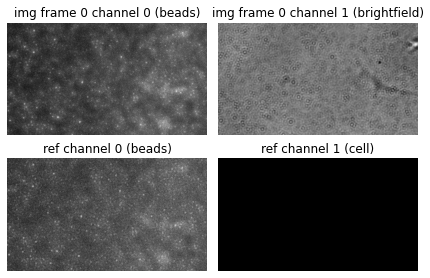

In [9]:
fig, ax = plt.subplots(2,2)
ax[0,0].set_title('img frame 0 channel 0 (beads)')
ax[0,0].imshow(img[0,0,:,:], cmap='gray')
ax[0,0].set_axis_off()

ax[0,1].set_title('img frame 0 channel 1 (brightfield)')
ax[0,1].imshow(img[0,1,:,:], cmap='gray')
ax[0,1].set_axis_off()

ax[1,0].set_title('ref channel 0 (beads)')
ax[1,0].imshow(ref[0,:,:], cmap='gray')
ax[1,0].set_axis_off()

ax[1,1].set_title('ref channel 1 (cell)')
ax[1,1].imshow(ref[1,:,:], cmap='gray')
ax[1,1].set_axis_off()

plt.tight_layout()

We can now process the stack to get the TFM results. We can set the verbose to 0 to stop any print statements. When the verbose is set to 1 the iterative PIV and the TFM function minimization is printed.

In [15]:
dataset1 = process_stack(img[:1,:,:,:], ref, traction_config, verbose=1)

----------------------------------------------------------
|----->     ||   The Open Source  P article              |
| Open      ||                    I mage                 |
|     PIV   ||                    V elocimetry  Toolbox  |
|     <-----||   www.openpiv.net          version 1.0    |
----------------------------------------------------------
 
('Algorithm : ', 'WiDIM')
 
Parameters   
-----------------------------------
('     ', 'Size of image', ' | ', [362, 641])
('     ', 'total number of iterations', ' | ', 1)
('     ', 'overlap ratio', ' | ', 0.5)
('     ', 'coarse factor', ' | ', 0)
('     ', 'time step', ' | ', 1.0)
('     ', 'validation method', ' | ', 'mean_velocity')
('     ', 'number of validation iterations', ' | ', 3)
('     ', 'subpixel_method', ' | ', 'gaussian')
('     ', 'Nrow', ' | ', array([21], dtype=int32))
('     ', 'Ncol', ' | ', array([39], dtype=int32))
('     ', 'Window sizes', ' | ', array([32], dtype=int32))
-----------------------------------
|   

A pandas DataFrame with the following columns: 

| Columns       | Description |
| :----------- | :----------- |
| frame      | frame number       |
| traction_map   | (n, m) numpy.ndarray of traction stress in Pa |
| force_field   | (n, m, 2) numpy.ndarray of x and y force components  |
| stack_bead_roi   | (2, w, h) numpy.ndarray of image stack before and after deformation after alignment |
| cell_roi   | (w, h) numpy.ndarray of cell in frame |
| mask_roi   | (w, h) numpy.ndarray of binary mask 0 is background and 1 is cell |
| beta   | parameter quantifying the noise in the image |
| L   | optimized regularization parameter |
| pos   | (2, N) positions from PIV of x and y. N depends on the minimum window size |
| vec   | (2, N) displacement from PIV of U and V. N depends on the minimum window size |

In [16]:
dataset1

                    L                beta  \
0  1719.9032558050835  3.5942979953065737   

                                            cell_roi  \
0  [[115, 95, 99, 86, 110, 108, 104, 105, 103, 11...   

                                         force_field frame mask_roi  \
0  [[[0.0251260028393649, -0.03688206605162128], ...     0        0   

                                                 pos  \
0  [[16.0, 32.0, 48.0, 64.0, 80.0, 96.0, 112.0, 1...   

                                      stack_bead_roi  \
0  [[[29, 29, 38, 29, 66, 29, 31, 56, 70, 75, 68,...   

                                        traction_map  \
0  [[0.2658423840407804, 0.2845051107806393, 0.25...   

                                                 vec  
0  [[-0.6679494380950928, -0.6648869514465332, -0...  

We can plot the traction maps using the plot function that takes the returned DataFrame and we can iterate through the frame number.

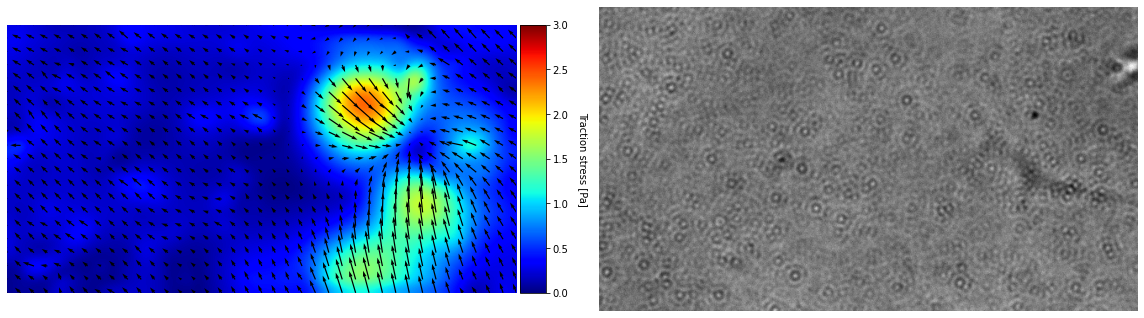

In [17]:
for frame in range(len(log1)):
    plot(dataset1, frame=frame, vmax=3)

We can also save the dataset out to file

In [19]:
dataset1.save('example1.h5')

True

If we wanted to read the data in at a later date

In [21]:
from pytraction import Dataset

dataset_loaded = Dataset('example1.h5')
print(dataset_loaded)

                    L                beta  \
0  1719.9032558050835  3.5942979953065737   

                                            cell_roi  \
0  [[115, 95, 99, 86, 110, 108, 104, 105, 103, 11...   

                                         force_field frame mask_roi  \
0  [[[0.0251260028393649, -0.03688206605162128], ...     0        0   

                                                 pos  \
0  [[16.0, 32.0, 48.0, 64.0, 80.0, 96.0, 112.0, 1...   

                                      stack_bead_roi  \
0  [[[29, 29, 38, 29, 66, 29, 31, 56, 70, 75, 68,...   

                                        traction_map  \
0  [[0.2658423840407804, 0.2845051107806393, 0.25...   

                                                 vec  
0  [[-0.6679494380950928, -0.6648869514465332, -0...  
